# 小额贷款风险预测

## 导入标准库

In [1]:
import io, os, sys, types, time, datetime, math, random, requests, subprocess,io, tempfile

## 导入第三方库

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from time import time
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.width', 400)
data = pd.read_csv('data.csv', encoding='gbk')
data.iloc[:, 270] = pd.Categorical(data.iloc[:, 270]).codes
data.fillna(value=-1, inplace=True)     # 去除空值
data

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (270) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,zmscore,jxl_xm_score,kexin_socre,tencent_socre,jiguang_black_score,overdue_day,xgf,y,jg_blackscore_label,ml_feature1,...,bd4,bd5,family_addr_label,bd6,bd7,bd8,bd9,bd10,bd11,bd12
0,666,359,529,42,-1.00,-1.0,589.0,0,0,0.0,...,0,0,1,5.0,3.0,2.0,4.0,1.0,1.0,4.0
1,672,421,616,51,42.43,1.0,751.0,0,1,1.0,...,0,0,1,5.0,2.0,1.0,4.0,2.0,1.0,4.0
2,686,521,707,16,-1.00,-1.0,511.0,0,0,0.0,...,0,0,1,5.0,3.0,1.0,5.0,3.0,1.0,5.0
3,695,392,850,19,-1.00,-1.0,775.0,0,0,0.0,...,0,0,1,4.0,3.0,2.0,3.0,1.0,2.0,3.0
4,731,398,782,19,-1.00,-1.0,377.0,0,0,1.0,...,0,0,1,4.0,1.0,1.0,4.0,1.0,1.0,5.0
5,668,380,587,19,-1.00,-1.0,638.0,0,0,1.0,...,0,0,1,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,650,100,850,17,-1.00,1.0,623.0,0,0,0.0,...,0,1,1,4.0,2.0,1.0,3.0,1.0,1.0,3.0
7,637,469,596,22,-1.00,-1.0,643.0,0,0,0.0,...,0,0,1,3.0,1.0,3.0,3.0,1.0,2.0,3.0
8,642,499,521,32,0.00,-1.0,778.0,0,0,1.0,...,0,0,1,5.0,3.0,3.0,3.0,3.0,3.0,3.0
9,638,490,850,27,-1.00,-1.0,744.0,0,0,0.0,...,0,0,1,3.0,1.0,2.0,3.0,1.0,2.0,4.0


In [4]:
data.shape

(5970, 1239)

In [5]:
x = data.drop(['y'], axis=1)
col_names = list(data.columns)
col_names

['zmscore',
 'jxl_xm_score',
 'kexin_socre',
 'tencent_socre',
 'jiguang_black_score',
 'overdue_day',
 'xgf',
 'y',
 'jg_blackscore_label',
 'ml_feature1',
 'ml_feature2',
 'ml_feature3',
 'ml_feature4',
 'ml_feature5',
 'ml_feature6',
 'ml_feature7',
 'ml_feature50',
 'ml_feature8',
 'ml_feature9',
 'ml_feature10',
 'ml_feature11',
 'ml_feature12',
 'ml_feature13',
 'ml_feature14',
 'ml_feature15',
 'ml_feature16',
 'ml_feature17',
 'ml_feature18',
 'ml_feature19',
 'ml_feature20',
 'ml_feature21',
 'ml_feature22',
 'ml_feature23',
 'ml_feature24',
 'ml_feature25',
 'ml_feature26',
 'ml_feature27',
 'ml_feature28',
 'ml_feature29',
 'ml_feature30',
 'ml_feature31',
 'ml_feature32',
 'ml_feature33',
 'ml_feature34',
 'ml_feature35',
 'ml_feature36',
 'ml_feature37',
 'ml_feature38',
 'ml_feature39',
 'ml_feature40',
 'ml_feature41',
 'ml_feature42',
 'ml_feature43',
 'ml_feature44',
 'ml_feature45',
 'ml_feature46',
 'ml_feature47',
 'ml_feature48',
 'ml_feature49',
 'dg_feature1',
 '

In [6]:
if 'y' in col_names:
    col_names.remove('y')
if 'overdue_day' in col_names:
    col_names.remove('overdue_day')
x = data[col_names]
y = data['y']
display(x.describe())
display( y.mean())

,zmscore,jxl_xm_score,kexin_socre,tencent_socre,jiguang_black_score,xgf,jg_blackscore_label,ml_feature1,ml_feature2,ml_feature3,...,bd4,bd5,family_addr_label,bd6,bd7,bd8,bd9,bd10,bd11,bd12
count,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,...,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000
mean,638.398995,415.197655,642.305193,42.705863,6.216611,583.746901,0.079397,0.062479,-0.064154,0.016248,...,0.515745,0.711223,0.908710,1.951759,0.913065,0.864824,1.933836,0.611055,0.623283,2.002848
std,40.342684,70.161782,113.269228,20.956534,23.510166,140.406454,0.270380,0.503247,0.355515,0.458976,...,3.083716,2.561364,0.288045,2.334490,1.564061,1.658573,2.307086,1.400456,1.485946,2.469684
min,0.000000,100.000000,300.000000,4.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,612.000000,379.000000,569.000000,26.000000,-1.000000,480.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,636.000000,414.000000,647.000000,39.000000,0.000000,597.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000
75%,662.000000,460.000000,720.000000,57.000000,0.000000,696.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,1.000000,4.000000
max,791.000000,644.000000,850.000000,98.000000,100.000000,829.000000,1.000000,1.000000,1.000000,1.000000,...,102.000000,17.000000,1.000000,5.000000,3.000000,4.000000,5.000000,3.000000,4.000000,5.000000


0.13467336683417086

In [7]:
model = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=13, min_samples_leaf=9,
                                   min_samples_split=5, max_features=0.5, class_weight={0:1, 1:10})
t_start = time()
model.fit(x, y)
t_end = time()
print('选择特征共耗时%.3f秒。' % (t_end - t_start))

选择特征共耗时24.126秒。


In [8]:
fi = np.array(model.feature_importances_)
idx = np.argsort(fi)
fi_value = pd.DataFrame(data=np.array((x.columns, fi)).T, columns=['特征名称', '重要度'])
fi_value

,特征名称,重要度
0,zmscore,0.0396768
1,jxl_xm_score,0.0127167
2,kexin_socre,0.0561493
3,tencent_socre,0.0425445
4,jiguang_black_score,0.00672887
5,xgf,0.123546
6,jg_blackscore_label,0.00220735
7,ml_feature1,0.00035956
8,ml_feature2,0.00066731
9,ml_feature3,0.000318351


In [9]:
selector = x.columns[fi > 0.01]
x = x[selector]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=13, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=9,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [10]:
y_train_pred_proba = model.predict_proba(x_train)[:, 1]
y_train_pred = model.predict(x_train)
y_train_pred = (y_train_pred_proba > 0.5)
print('训练集正确率：', accuracy_score(y_train, y_train_pred))
print('训练集精确度：', precision_score(y_train, y_train_pred))
print('训练集召回率：', recall_score(y_train, y_train_pred))
print('训练集F1 值：', f1_score(y_train, y_train_pred))
print('训练集AUC值：', roc_auc_score(y_train, y_train_pred_proba))

训练集正确率： 0.8932160804020101
训练集精确度： 0.56
训练集召回率： 0.9420970266040689
训练集F1 值： 0.7024504084014003
训练集AUC值： 0.9687264402356988


In [11]:
y_test_pred_proba = model.predict_proba(x_test)[:, 1]
y_test_pred = (y_test_pred_proba > 0.5)
# Kolmogorov-Smirnov值
get_ks = lambda y_pred, y_true: ks_2samp(y_pred[y_true == 1], y_pred[y_true != 1]).statistic
print('测试集KS值：', get_ks(y_test_pred_proba, y_test))
print('测试集正确率：', accuracy_score(y_test, y_test_pred))
print('测试集召回率：', recall_score(y_test, y_test_pred))
print('测试集精确度：', precision_score(y_test, y_test_pred))
print('测试集F1 值：', f1_score(y_test, y_test_pred))
print('测试集AUC值：', roc_auc_score(y_test, y_test_pred_proba))

测试集KS值： 0.48147362841240393
测试集正确率： 0.8031825795644891
测试集召回率： 0.5696969696969697
测试集精确度： 0.3643410852713178
测试集F1 值： 0.4444444444444445
测试集AUC值： 0.8020849898400919


array([0.00000000e+00, 6.53594771e-04, 2.46913580e-03, 6.25000000e-03,
       6.45161290e-03, 7.69230769e-03, 8.00000000e-03, 8.33333333e-03,
       8.51063830e-03, 9.09090909e-03, 9.52380952e-03, 1.00000000e-02,
       1.00584668e-02, 1.05263158e-02, 1.09774436e-02, 1.25000000e-02,
       1.31465517e-02, 1.62337662e-02, 1.63879599e-02, 1.70212766e-02,
       1.78571429e-02, 3.08861529e-02, 3.10154784e-02, 4.50462744e-02,
       4.51381951e-02, 6.81952076e-02, 6.92637363e-02, 7.19349369e-02,
       7.23368158e-02, 8.09444388e-02, 8.10157495e-02, 9.43504002e-02,
       9.45440026e-02, 9.73846027e-02, 9.77964213e-02, 1.07347346e-01,
       1.07389563e-01, 1.15457192e-01, 1.16094359e-01, 1.18985609e-01,
       1.19154497e-01, 1.23304420e-01, 1.23665578e-01, 1.25363421e-01,
       1.25435755e-01, 1.46313343e-01, 1.47555711e-01, 1.54292771e-01,
       1.54564028e-01, 1.60686400e-01, 1.60703211e-01, 1.84186067e-01,
       1.84334838e-01, 1.89444154e-01, 1.89799545e-01, 1.91785522e-01,
      

'fpr = '

array([0.00000000e+00, 0.00000000e+00, 9.71817298e-04, 9.71817298e-04,
       2.91545190e-03, 2.91545190e-03, 3.88726919e-03, 3.88726919e-03,
       4.85908649e-03, 4.85908649e-03, 6.80272109e-03, 6.80272109e-03,
       1.06899903e-02, 1.06899903e-02, 1.26336249e-02, 1.26336249e-02,
       1.36054422e-02, 1.36054422e-02, 1.55490768e-02, 1.55490768e-02,
       1.65208941e-02, 1.65208941e-02, 1.74927114e-02, 1.74927114e-02,
       2.04081633e-02, 2.04081633e-02, 2.13799806e-02, 2.13799806e-02,
       2.33236152e-02, 2.33236152e-02, 2.72108844e-02, 2.72108844e-02,
       2.91545190e-02, 2.91545190e-02, 3.40136054e-02, 3.40136054e-02,
       4.47035957e-02, 4.47035957e-02, 4.56754130e-02, 4.56754130e-02,
       4.85908649e-02, 4.85908649e-02, 5.05344995e-02, 5.05344995e-02,
       5.44217687e-02, 5.44217687e-02, 5.83090379e-02, 5.83090379e-02,
       5.92808552e-02, 5.92808552e-02, 6.80272109e-02, 6.80272109e-02,
       6.89990282e-02, 6.89990282e-02, 6.99708455e-02, 6.99708455e-02,
      

'tpr = '

array([0.00606061, 0.01212121, 0.01212121, 0.06666667, 0.06666667,
       0.07878788, 0.07878788, 0.08484848, 0.08484848, 0.09090909,
       0.09090909, 0.0969697 , 0.0969697 , 0.1030303 , 0.1030303 ,
       0.10909091, 0.10909091, 0.11515152, 0.11515152, 0.13333333,
       0.13333333, 0.13939394, 0.13939394, 0.14545455, 0.14545455,
       0.17575758, 0.17575758, 0.18181818, 0.18181818, 0.2       ,
       0.2       , 0.20606061, 0.20606061, 0.21212121, 0.21212121,
       0.23636364, 0.23636364, 0.24242424, 0.24242424, 0.25454545,
       0.25454545, 0.26060606, 0.26060606, 0.26666667, 0.26666667,
       0.27272727, 0.27272727, 0.27878788, 0.27878788, 0.2969697 ,
       0.2969697 , 0.3030303 , 0.3030303 , 0.31515152, 0.31515152,
       0.32727273, 0.32727273, 0.33333333, 0.33333333, 0.35151515,
       0.35151515, 0.36363636, 0.36363636, 0.39393939, 0.39393939,
       0.4       , 0.4       , 0.40606061, 0.40606061, 0.41212121,
       0.41212121, 0.41818182, 0.41818182, 0.42424242, 0.42424

'KS = '

0.4814736284124039

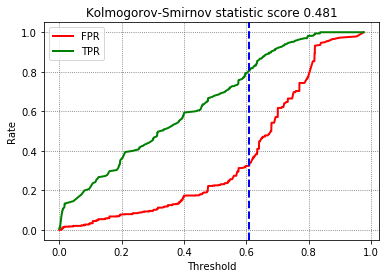

In [12]:
# 手动计算KS值
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
thresholds = thresholds[::-1].clip(0, 1)   # 非必须
display(thresholds)
display('fpr = ', fpr)
display('tpr = ', tpr)
tf = np.array(tpr - fpr)
tf_index = np.argmax(tf)
ks = tf[tf_index]
display('KS = ', ks)
plt.plot(thresholds, fpr, 'r-', lw=2, label='FPR')
plt.plot(thresholds, tpr, 'g-', lw=2, label='TPR')
plt.axvline(thresholds[tf_index], ymin=0, ymax=1, ls='--', color='b', lw='2')
plt.legend(loc='upper left')
plt.grid(b=True, ls=':', color='#606060')
plt.title('Kolmogorov-Smirnov statistic score %.3f' % ks, fontsize=12)
plt.xlabel('Threshold', fontsize=10)
plt.ylabel('Rate', fontsize=10)
plt.show()